# Australian Fire Data Brightness temperature analysis

### Multiplot of whether the brightness is saturated, i.e. plot of lat vs long for those points with brightness saturated and a separate for those who are not (within the same figure on separate axes). 

### Differences in the distributions of the two groups

### Better ways to compare the two distributions

In [ ]:
import sys
import numpy as np 
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Data into Pandas DataFrame

In [ ]:
AusFireDataSet = pd.read_csv('../data/fire_nrt_V1_96617.csv')

## Encoding Categorical values: DayNight as Day  = 1 Night = 0 and Confidence as 0, 1, 2 for low, nominal and high values

In [ ]:
daynight_encode = {"D": 1, "N": 0}
confidence_encode = {"l":0,"n":1,"h":2}

In [ ]:
AusFireDataSet['daynight'] = AusFireDataSet['daynight'].map(daynight_encode)
AusFireDataSet['confidence'] = AusFireDataSet['confidence'].map(confidence_encode)
AusFireDataSet.drop(['satellite', 'instrument', 'version', 'acq_time','acq_date'], axis =1, inplace = True)

In [ ]:
AusFireDataSet.describe(include = "all")

,latitude,longitude,bright_ti4,scan,track,confidence,bright_ti5,frp,daynight
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,1.033037,299.311259,15.557809,0.483835
std,8.008223,10.986038,21.988456,0.089811,0.118792,0.438866,14.724600,45.584396,0.499739
min,-43.212320,113.447010,208.000000,0.320000,0.360000,0.000000,150.000000,0.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,1.000000,289.500000,2.100000,0.000000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1.000000,295.600000,5.200000,0.000000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1.000000,307.600000,13.200000,1.000000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,2.000000,380.000000,10717.200000,1.000000


## Unprocessed Histogram and Box Pot

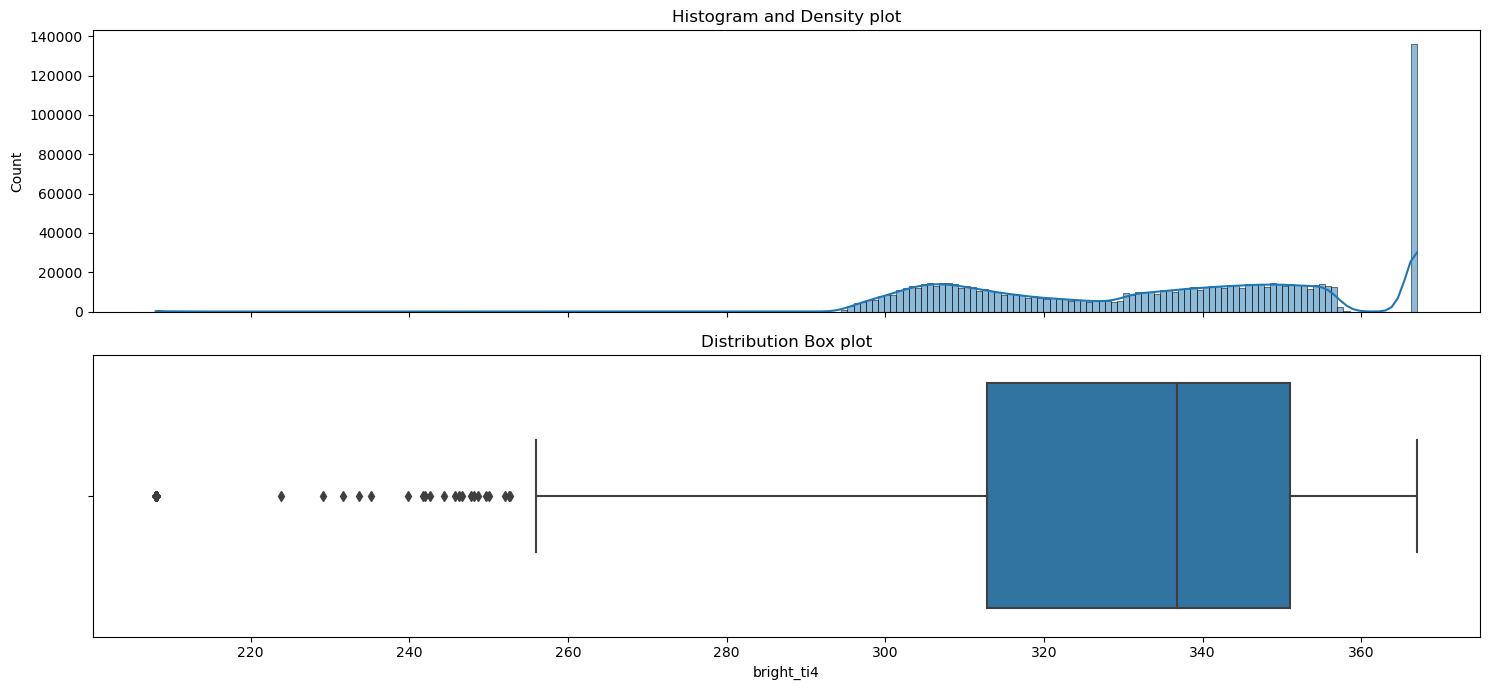

In [ ]:
fig, ax = plt.subplots(2, layout = 'tight',figsize=(15,7), sharex=True)
sns.histplot(ax=ax[0], x=AusFireDataSet['bright_ti4'], kde=True)
ax[0].set_title('Histogram and Density plot')
sns.boxplot(ax=ax[1], x=AusFireDataSet['bright_ti4'])
ax[1].set_title('Distribution Box plot')
plt.show()

### From the above Histogram we can observe that the Data is highly saturated for values above 360 additionally there are a lot of outliers as well on the lowerend of the spectrum as seen from box plot

### We will now utilize a mask to seperate the saturated data from the unsaturated ones

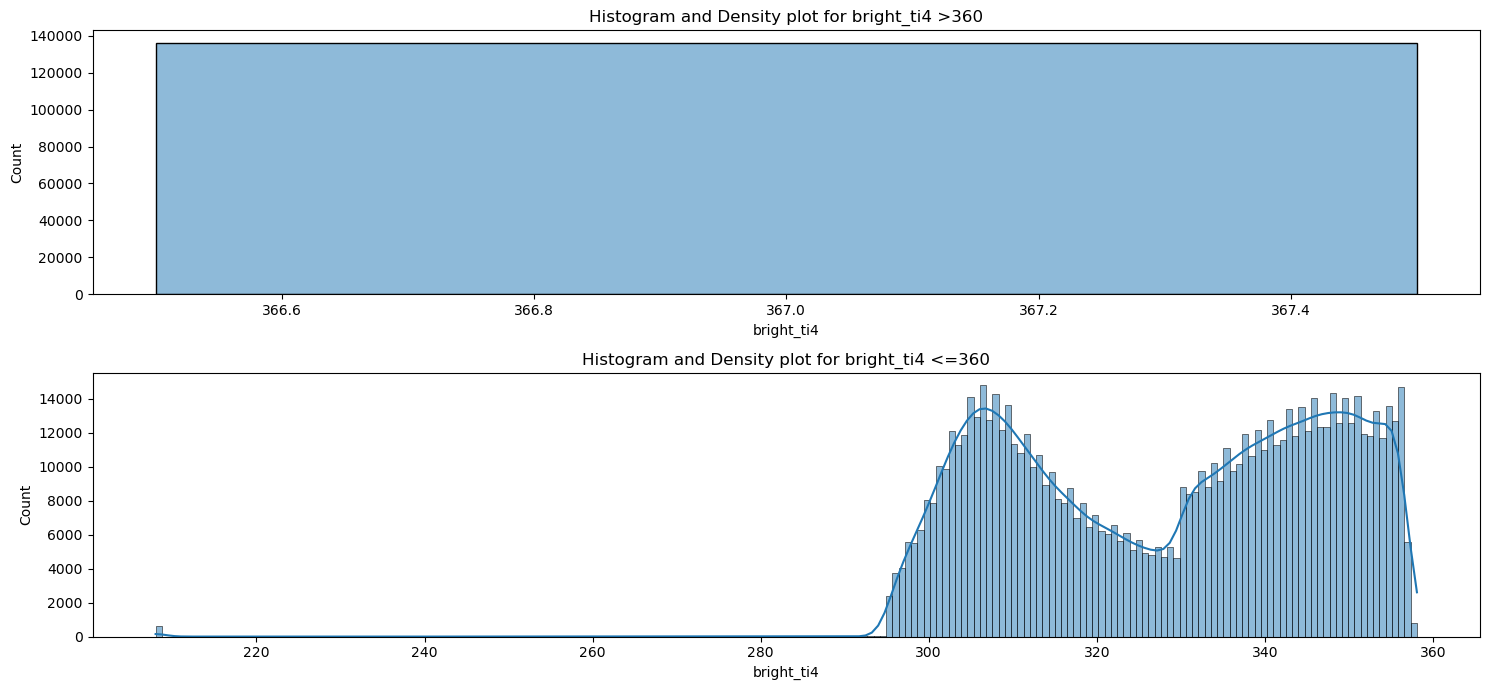

In [ ]:
AusFireDataSet_Absat = AusFireDataSet[AusFireDataSet['bright_ti4']>360]
AusFireDataSet_Blsat = AusFireDataSet[AusFireDataSet['bright_ti4']<=360]
fig, ax = plt.subplots(2,layout = 'tight',figsize=(15,7))
sns.histplot(ax=ax[0], x=AusFireDataSet_Absat['bright_ti4'], kde=True)
sns.histplot(ax=ax[1], x=AusFireDataSet_Blsat['bright_ti4'], kde=True)
ax[0].set_title('Histogram and Density plot for bright_ti4 >360')
ax[1].set_title('Histogram and Density plot for bright_ti4 <=360')
plt.show()

### Further from the above histogram we can observe that the datapoints below 290-295 are not visualized fully so we will repeat this procedure again for lower section

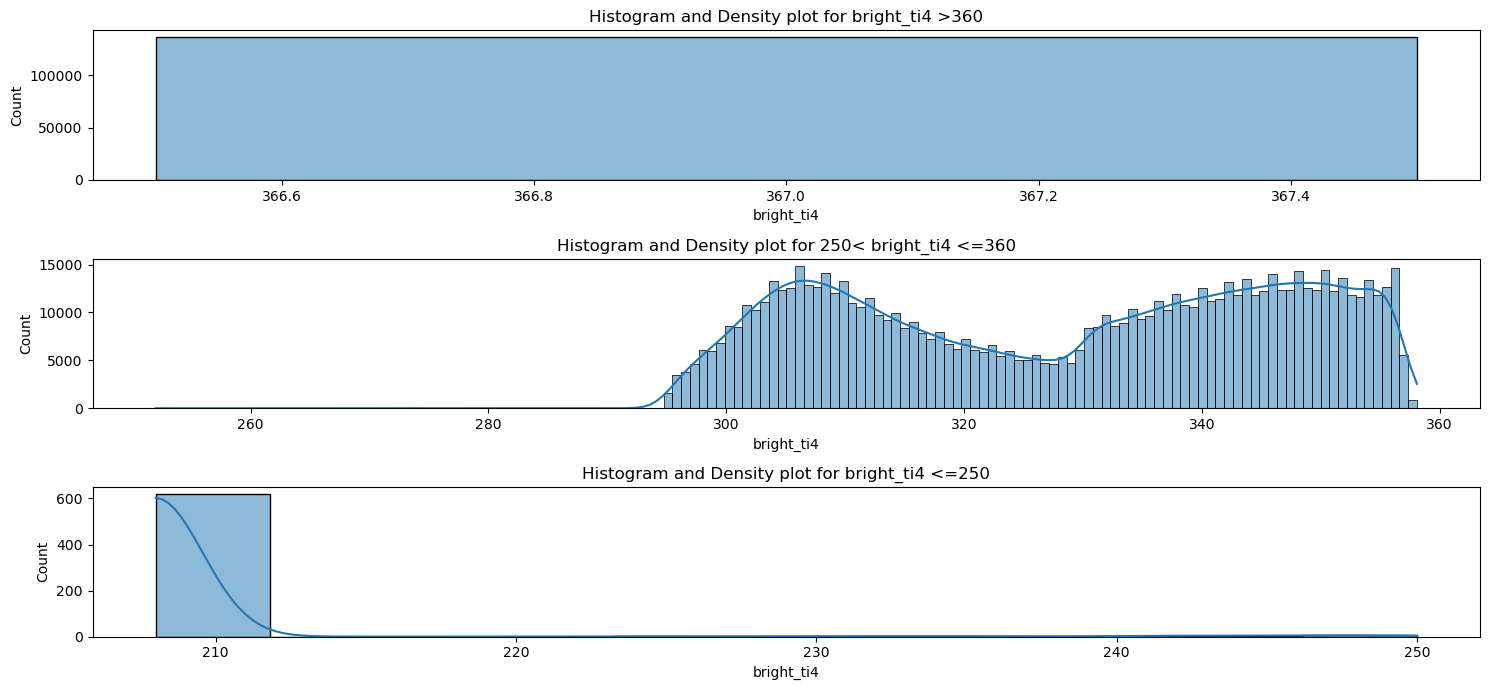

In [ ]:
AusFireDataSet_Btw250n360 = AusFireDataSet_Blsat[AusFireDataSet_Blsat['bright_ti4']>250]
AusFireDataSet_Bl250 = AusFireDataSet_Blsat[AusFireDataSet_Blsat['bright_ti4']<=250]
fig, ax = plt.subplots(3, layout = 'tight',figsize=(15,7))
sns.histplot(ax=ax[0], x=AusFireDataSet_Absat['bright_ti4'], kde=True)
sns.histplot(ax=ax[1], x=AusFireDataSet_Btw250n360['bright_ti4'], kde=True)
sns.histplot(ax=ax[2], x=AusFireDataSet_Bl250['bright_ti4'], kde=True)
ax[0].set_title('Histogram and Density plot for bright_ti4 >360')
ax[1].set_title('Histogram and Density plot for 250< bright_ti4 <=360')
ax[2].set_title('Histogram and Density plot for bright_ti4 <=250')
plt.show()

## Using the distributions segregated in the previous steps we will now perform Hexbin plots to analyze the Forest Fire instances reported based on these distributions

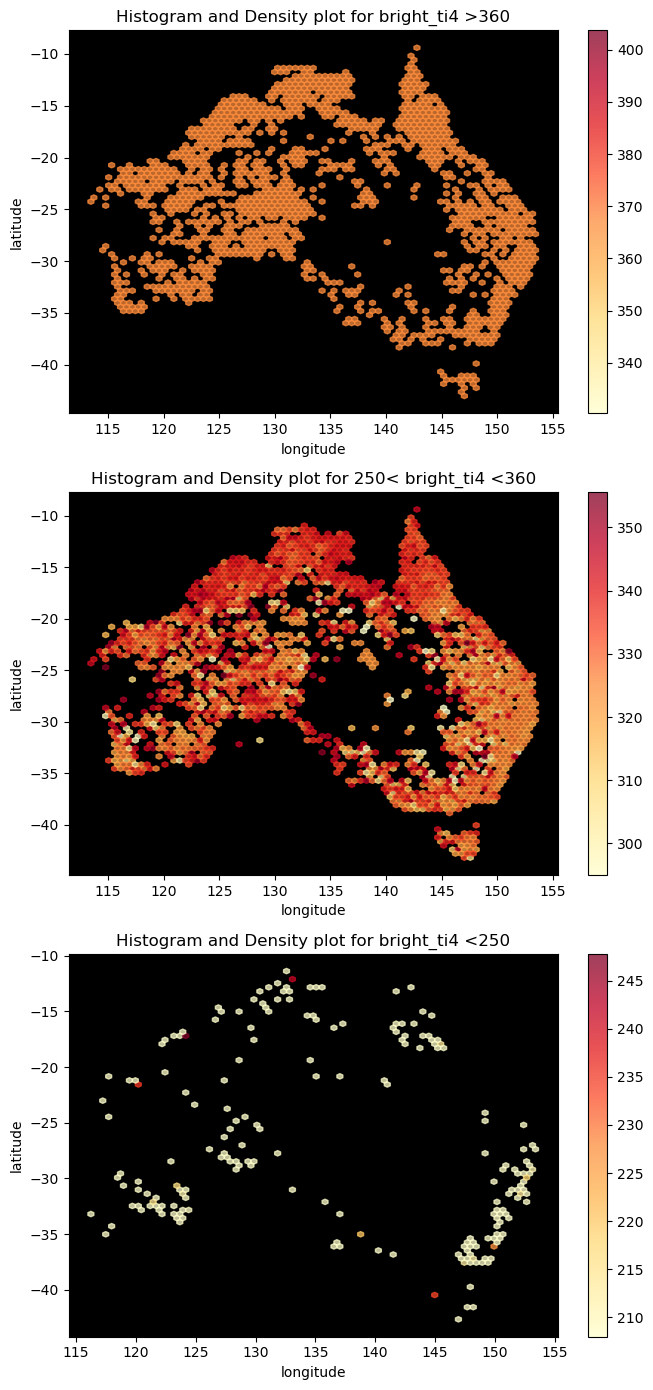

In [ ]:
fig, ax = plt.subplots(3,layout = 'tight', figsize=(7,14))

a = AusFireDataSet_Absat.plot(ax = ax[0],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (75), alpha= 0.75,
                     label="Fire Readings detected" , cmap=plt.get_cmap("YlOrRd"), colorbar=True)
a.set_facecolor('black')
b = AusFireDataSet_Btw250n360.plot(ax = ax[1],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (75), alpha= 0.75,
                     label="Fire Readings detected" , cmap=plt.get_cmap("YlOrRd"), colorbar=True)
b.set_facecolor('black')
c = AusFireDataSet_Bl250.plot(ax = ax[2],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (75), alpha= 0.75,
                     label="Fire Readings detected" , cmap=plt.get_cmap("YlOrRd"), colorbar=True)
c.set_facecolor('black')
ax[0].set_title('Histogram and Density plot for bright_ti4 >360')
ax[1].set_title('Histogram and Density plot for 250< bright_ti4 <360')
ax[2].set_title('Histogram and Density plot for bright_ti4 <250')
plt.show()

### From the Previous Hexbin plots showing the 3 different observed distibutions and the Box plot of the entire data, We can infere that the datapoints > 360 are highly saturated with low variance amongst them. 

### Ideally if we use all the data from these data points, it may lead to severe Overfitting towards brightness values > 360.  

### Aditionally, We can also see that the local distribution of the 250 - 360 band already covers the majority of the Higher end Band and provides datapoints with good variance and generalization.

## We can see the various distributions have difference in thier frequency as well as from the earlier box plot that the distribution set below 250 can be considered outliers

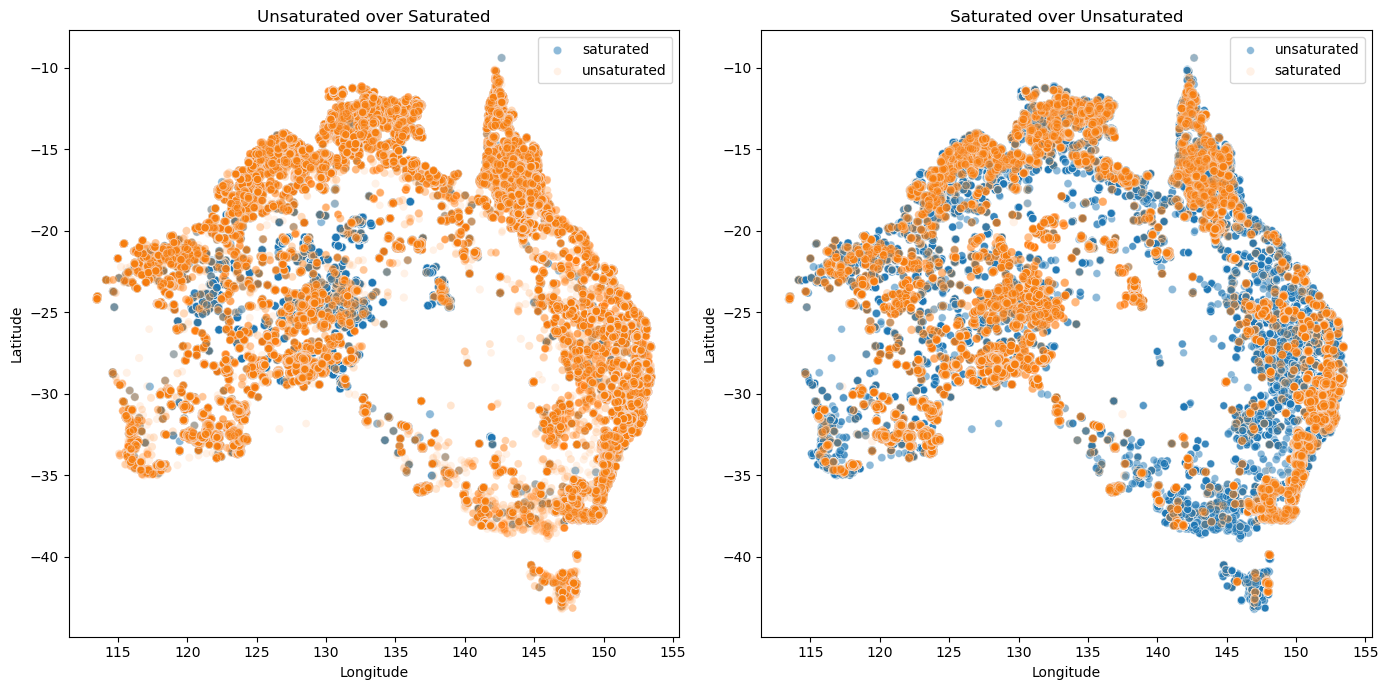

In [ ]:
plt.subplots(layout = 'tight', figsize=(14,7))
fig1 = plt.subplot(1,2,1)
sns.scatterplot( x=AusFireDataSet_Absat["longitude"], y=AusFireDataSet_Absat["latitude"], s = AusFireDataSet_Absat["bright_ti4"]/10, label='saturated', alpha= 0.5)
sns.scatterplot( x=AusFireDataSet_Btw250n360["longitude"], y=AusFireDataSet_Btw250n360["latitude"], s = AusFireDataSet_Btw250n360["bright_ti4"]/10, label='unsaturated', alpha= 0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Unsaturated over Saturated")

plt.subplot(1,2,2)
sns.scatterplot( x=AusFireDataSet_Btw250n360["longitude"], y=AusFireDataSet_Btw250n360["latitude"],s = AusFireDataSet_Btw250n360["bright_ti4"]/10, label='unsaturated', alpha= 0.5)
sns.scatterplot( x=AusFireDataSet_Absat["longitude"], y=AusFireDataSet_Absat["latitude"], s = AusFireDataSet_Absat["bright_ti4"]/10, label='saturated',alpha= 0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Saturated over Unsaturated")
plt.show()

## From the Overlapped plots we can see that the Saturated Datapoints are completely Overplotted by Unsaturated datapoints